### This notebook creates 4 CSV files with $n$ rows and  $(h * w) + 1$ columns each, where $n$ is the number of pictures per image set and $h$ and $w$ are height and width of a picture. The first $h * w$ cells of the $n$th row contain the mean of the RGB value of a pixel of the $n$th picture of the respective image set. The last column contains the labels of the respective images.

In [61]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

WIDTH, HEIGHT = 124, 124

In [62]:
def convert_images_to_csv(images_description_path):
    CSV_PATH = "data/" + images_description_path + ".csv"
    
    # Load file with image paths
    with open("data/" + images_description_path) as f:
        data_file = f.read().splitlines() 

    # Split in paths and labels
    image_paths = []
    labels = []
    for entry in data_file:
        path, label = entry.split(' ')
        image_paths.append(path)
        labels.append(label)

    # Sanitize paths
    if not os.path.isfile(image_paths[0]):
        image_paths = [x.replace('Train/', 'Train/Train/') for x in image_paths]
    assert os.path.isfile(image_paths[0])

    # Convert image to matrix
    def png_to_matrix(path):
        def convert_rgba_to_rgb(path):
            png = Image.open(path)
            png.load() # required for png.split()
            if len(png.split()) > 3:
                background = Image.new("RGB", png.size, (255, 255, 255))
                background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
                return background
            else:
                return png
        img = convert_rgba_to_rgb(path)
        img_mean = np.mean(img, axis=2)
        return np.asarray(img_mean)
    
    
    # Test png_to_matrix with first picture
    img = png_to_matrix(image_paths[0])
    print("Image matrix shape:", img.shape)
    plt.imshow(img, cmap='gray')
    plt.show()

    # Build dataframe with X and y
    columns = [str(x) for x in range(WIDTH * HEIGHT)] + ["label"]
    df = pd.DataFrame([], columns=columns)
    
    for path, y in zip(image_paths, labels):
        img_id = '.'.join(path.split('/')[-1].split('.')[:-1])
        try:
            img = png_to_matrix(path).reshape([-1])
            img = np.append(img, y)
            s = pd.Series(img, index=columns)
            
            if not os.path.isfile(CSV_PATH):
                df = pd.DataFrame([], columns=columns)
                df.to_csv(CSV_PATH, index=False)
            
            with open(CSV_PATH, "a") as f:
                features = ",".join([str(x) for x in s]) + "\n"
                f.write(features)
            print(".", end='')
        except Exceptiontio as e:
            print(img_id + ": " + e)


  0%|          | 0/1 [00:00<?, ?it/s]

/mnt/naruto/mina_workspace/Brain_5Classes/Data/HT/IXI002-Guys-0828-T1.nii.nz.100_Flair_127.nx.100_.png
Image matrix shape: (256, 256)


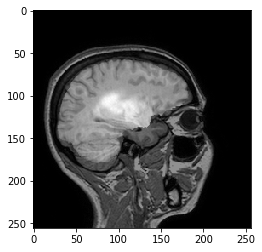

...................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

In [63]:
for path in tqdm(['subset-1-HnxTny.txt', 'subset-2-HnyTnz.txt', 'subset-3-HnzTnx.txt', 'subset-4-All.txt']):
    convert_images_to_csv(path)

In [17]:
# I aborted after adding one picture to the CSV file
pd.read_csv("data/subset-1-HnxTny.txt.csv", index_col=False)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,15367,15368,15369,15370,15371,15372,15373,15374,15375,label
0,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
